### Wiki에 있는 대한민국 인구통계 데이터에 대한 분석 
###### https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%9D%B8%EA%B5%AC

In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style='whitegrid',  palette="pastel" )

####한글폰트, 차트의 음수축을 사용하기 위해 
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus = False)

#### <font color = blue> Step 1. 웹사이트의 테이블 데이터를 가져와 DataFrame으로 만든다 </font>
##### <font color = blue> - pd.read_csv("target url") </font>

In [3]:
tables = pd.read_html('https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%9D%B8%EA%B5%AC')
len(tables)

3

In [6]:
#tables[0]
tables[1]
#tables[2]

,연도 (년),추계인구(명),출생자수(명),사망자수(명),자연증가수(명),조출생률(%),조사망률(%),자연증가율(%),합계출산율(%)
0,1925,12997611.0,558897,359042,199855,43.0,27.6,15.4,6.59
1,1926,13052741.0,511667,337948,173719,39.2,25.9,13.3,NaN
2,1927,13037169.0,534524,353818,180706,41.0,27.1,13.9,NaN
3,1928,13105131.0,566142,357701,208441,43.2,27.3,15.9,NaN
4,1929,13124279.0,566969,414366,152603,43.2,31.6,11.6,NaN
...,...,...,...,...,...,...,...,...,...
90,2015,51014947.0,438420,275895,162925,8.6,5.4,3.2,1.24
91,2016,51245707.0,406243,280827,125416,7.9,5.5,2.4,1.17
92,2017,51446201.0,357771,285534,72237,7.0,5.5,1.5,1.05
93,2018,51635256.0,326822,298820,28002,6.4,5.8,0.6,0.98


In [10]:
#### 1번 테이블이 분석대상이다. 
df = tables[1]
print(df.shape)
df.head()

(95, 9)


,연도 (년),추계인구(명),출생자수(명),사망자수(명),자연증가수(명),조출생률(%),조사망률(%),자연증가율(%),합계출산율(%)
0,1925,12997611.0,558897,359042,199855,43.0,27.6,15.4,6.59
1,1926,13052741.0,511667,337948,173719,39.2,25.9,13.3,NaN
2,1927,13037169.0,534524,353818,180706,41.0,27.1,13.9,NaN
3,1928,13105131.0,566142,357701,208441,43.2,27.3,15.9,NaN
4,1929,13124279.0,566969,414366,152603,43.2,31.6,11.6,NaN


#### <font color = blue> Step 2. 시각화하여 데이터를 살펴보자  </font>
##### <font color = blue> - seaborn lineplot, seaborn pointplot, and pandas plot()  </font>

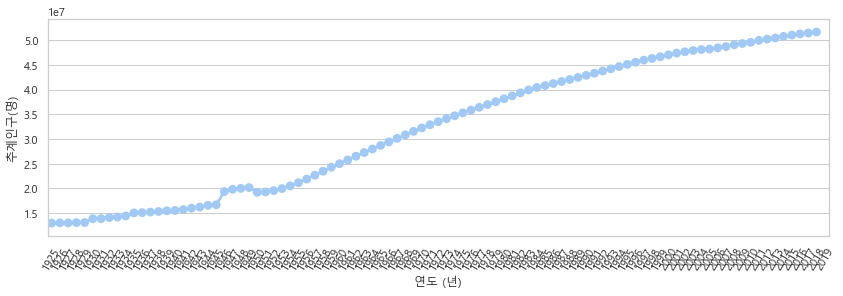

In [19]:
#### 1925년 부터 현재까지 연도별 인구의 추이는? 
plt.figure(figsize = (14,4))
plt.xticks(rotation = 60)
sns.pointplot(data = df, x='연도 (년)', y='추계인구(명)')

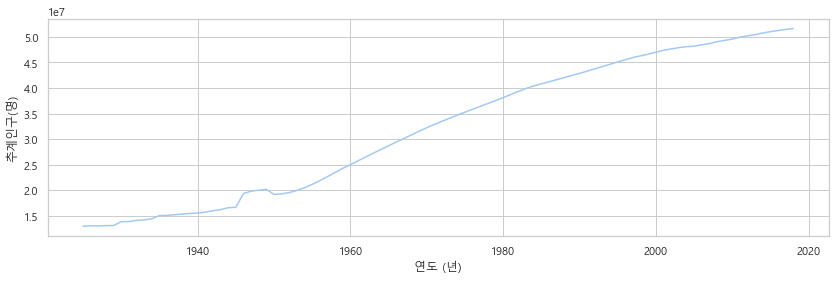

In [20]:
plt.figure(figsize = (14,4))
sns.lineplot(data = df, x='연도 (년)', y='추계인구(명)')

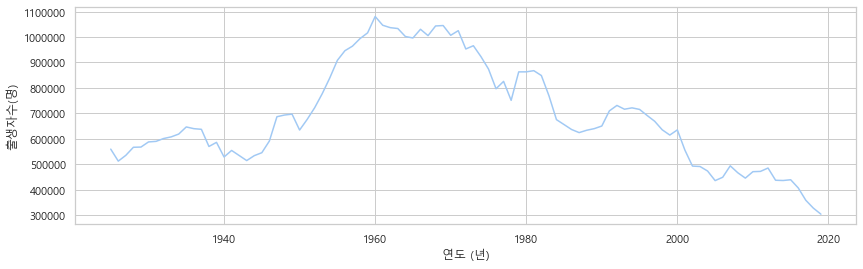

In [21]:
#### 연도별 출생자수 추이는? 
plt.figure(figsize = (14,4))
sns.lineplot(data = df, x='연도 (년)', y='출생자수(명)')

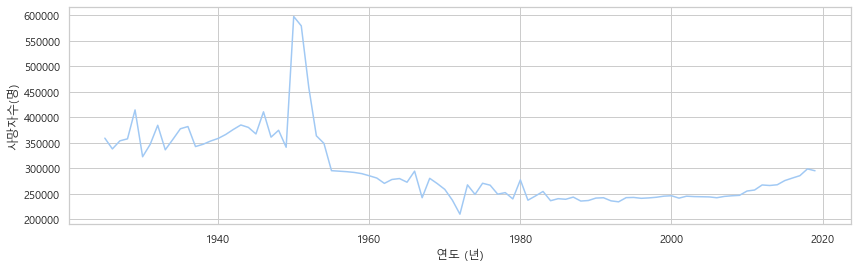

In [22]:
#### 연도별 사망자수 추이는? 
plt.figure(figsize = (14,4))
sns.lineplot(data = df, x='연도 (년)', y='사망자수(명)')

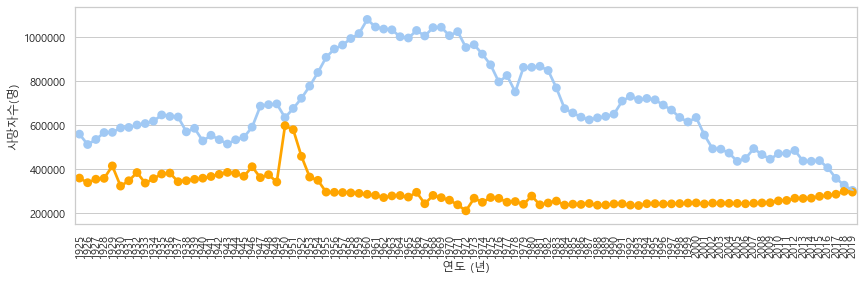

In [25]:
#### 출생자수와 사망자수를 동시에 표현해보자 
plt.figure(figsize = (14,4))
plt.xticks(rotation = 90)

sns.pointplot(data = df, x='연도 (년)', y='출생자수(명)')
sns.pointplot(data = df, x='연도 (년)', y='사망자수(명)', color = 'orange')

In [32]:
#### seaborn 말고, pandas로 그려보자 
df.head()

,연도 (년),추계인구(명),출생자수(명),사망자수(명),자연증가수(명),조출생률(%),조사망률(%),자연증가율(%),합계출산율(%)
0,1925,12997611.0,558897,359042,199855,43.0,27.6,15.4,6.59
1,1926,13052741.0,511667,337948,173719,39.2,25.9,13.3,NaN
2,1927,13037169.0,534524,353818,180706,41.0,27.1,13.9,NaN
3,1928,13105131.0,566142,357701,208441,43.2,27.3,15.9,NaN
4,1929,13124279.0,566969,414366,152603,43.2,31.6,11.6,NaN


In [35]:
df_p = df[['연도 (년)', '출생자수(명)', '사망자수(명)']].set_index('연도 (년)')
df_p

,출생자수(명),사망자수(명)
연도 (년),,
1925,558897,359042
1926,511667,337948
1927,534524,353818
1928,566142,357701
1929,566969,414366
...,...,...
2015,438420,275895
2016,406243,280827
2017,357771,285534


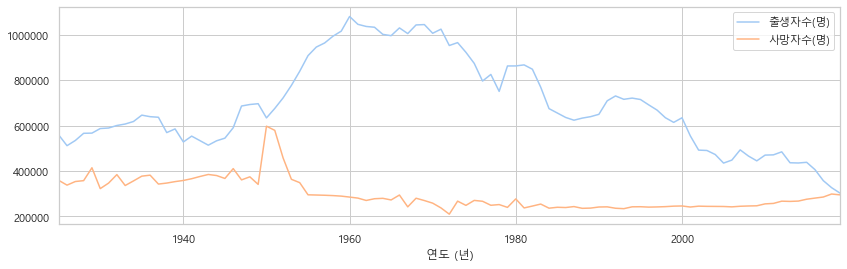

In [42]:
df_p.plot(figsize=(14,4))

#### <font color = blue> Step 3. 최근 50년간의 변화에 집중해서 살펴보자 </font>
##### <font color = blue> - pandas의 slice 기능 활용 </font>

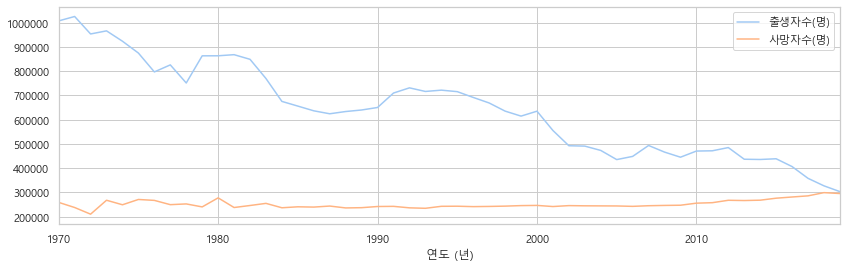

In [45]:
df_p[-50:].plot(figsize = (14,4))

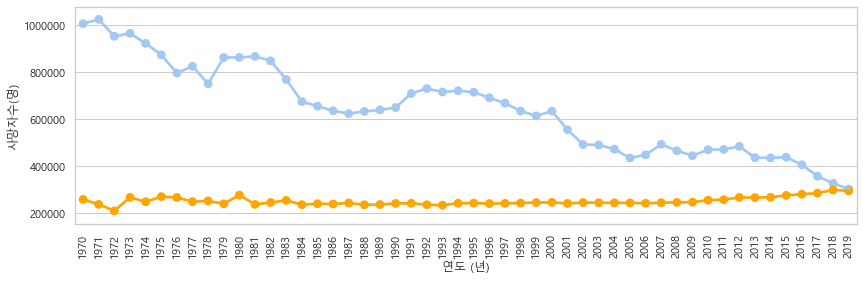

In [59]:
plt.figure(figsize = (14,4))
plt.xticks(rotation = 90)

sns.pointplot(data = df[-50:], x='연도 (년)', y='출생자수(명)' )
sns.pointplot(data = df[-50:], x='연도 (년)', y='사망자수(명)', color = 'orange' )

#### <font color = blue> Step 4. 추계인구를 분석해 보자 </font>
##### <font color = blue> - seaborn에서 palette 옵션 사용 </font>

In [60]:
df.head()

,연도 (년),추계인구(명),출생자수(명),사망자수(명),자연증가수(명),조출생률(%),조사망률(%),자연증가율(%),합계출산율(%)
0,1925,12997611.0,558897,359042,199855,43.0,27.6,15.4,6.59
1,1926,13052741.0,511667,337948,173719,39.2,25.9,13.3,NaN
2,1927,13037169.0,534524,353818,180706,41.0,27.1,13.9,NaN
3,1928,13105131.0,566142,357701,208441,43.2,27.3,15.9,NaN
4,1929,13124279.0,566969,414366,152603,43.2,31.6,11.6,NaN


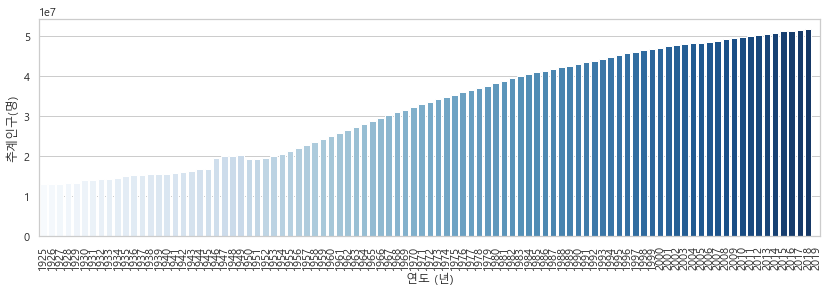

In [69]:
plt.figure(figsize = (14,4))
plt.xticks(rotation = 90)
sns.barplot(data = df, x='연도 (년)', y='추계인구(명)', palette = 'Blues')

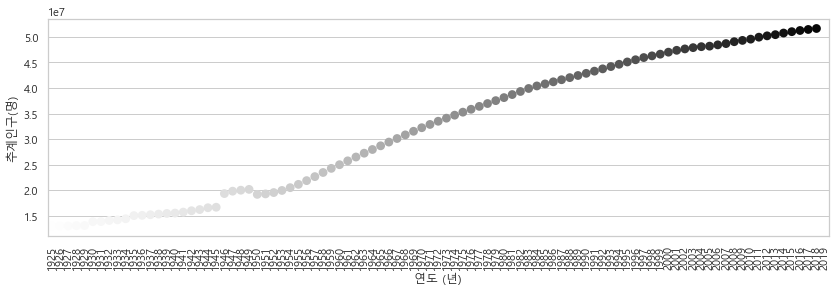

In [79]:
plt.figure(figsize = (14,4))
plt.xticks(rotation = 90)
sns.pointplot(data = df, x='연도 (년)', y='추계인구(명)', palette = 'Greys')

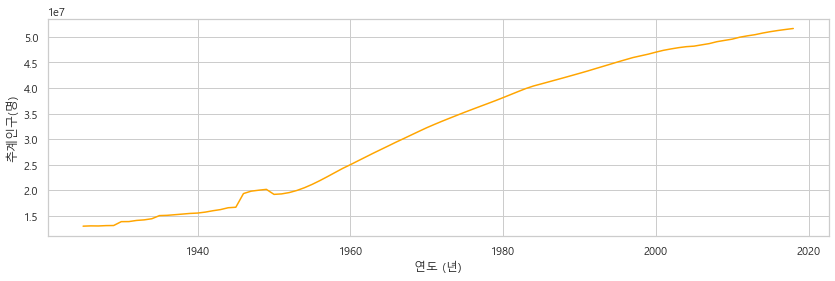

In [80]:
plt.figure(figsize = (14,4))
sns.lineplot(data = df, x='연도 (년)', y='추계인구(명)', color = 'Orange')